Basket Market sales Analysis

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('C:/Users/david/Desktop/Curso ML/Pandas/Basket_market_sales.csv') # Casa
#df=pd.read_csv('C:/Users/Monica Luna/Desktop/Curso ML/Pandas/Basket_market_sales.csv') # IMN

In [8]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [14]:
df.shape

(286392, 36)

In [16]:
df.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [12]:
# Revisión de valores nulos y duplicados
print(df.isnull().sum())
print('\nDuplicados:', df.duplicated().sum())

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

Duplicados: 0


In [14]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [16]:
# convertimos a datetime
df['order_date']=pd.to_datetime(df['order_date'])

In [18]:
df.drop(columns=['year','month'], inplace=True)

In [20]:
# qty_ordered, price, total deben de ser numéricos numéricos. sino--> pd.to_numeric()
print(df['qty_ordered'].dtype,df['price'].dtype,df['total'].dtype)

float64 float64 float64


In [22]:
# 2. Análisis exploratorio EDA

In [24]:
# comporbamos la consistencia de las columnas
# si hubiera inconsistnecia se deberia modificar: cambiar nombre, quitar espacion, etc
print(df['category'].unique())
print(df['State'].unique())

["Men's Fashion" 'Mobiles & Tablets' 'Computing' 'Appliances'
 'Home & Living' "Women's Fashion" 'Health & Sports' 'Beauty & Grooming'
 'Superstore' 'Others' 'Entertainment' 'Soghaat' 'Kids & Baby' 'Books'
 'School & Education']
['OK' 'FL' 'ND' 'HI' 'WY' 'GA' 'TN' 'RI' 'IL' 'KY' 'AZ' 'AR' 'MS' 'NE'
 'NJ' 'WV' 'CA' 'MO' 'LA' 'TX' 'MI' 'PA' 'VA' 'MN' 'MT' 'ME' 'NM' 'IA'
 'OH' 'SC' 'NC' 'UT' 'IN' 'AL' 'VT' 'NY' 'SD' 'CT' 'OR' 'NH' 'CO' 'DC'
 'MD' 'ID' 'KS' 'NV' 'AK' 'WA' 'MA' 'WI' 'DE']


In [26]:
df.rename(columns={'State':'State_abb'}, inplace=True)

In [28]:
# Complete name of states
dicc_states = {
    'OK': 'Oklahoma', 'FL': 'Florida', 'ND': 'North Dakota', 'HI': 'Hawaii', 'WY': 'Wyoming',
    'GA': 'Georgia', 'TN': 'Tennessee', 'RI': 'Rhode Island', 'IL': 'Illinois', 'KY': 'Kentucky',
    'AZ': 'Arizona', 'AR': 'Arkansas', 'MS': 'Mississippi', 'NE': 'Nebraska', 'NJ': 'New Jersey',
    'WV': 'West Virginia', 'CA': 'California', 'MO': 'Missouri', 'LA': 'Louisiana', 'TX': 'Texas',
    'MI': 'Michigan', 'PA': 'Pennsylvania', 'VA': 'Virginia', 'MN': 'Minnesota', 'MT': 'Montana',
    'ME': 'Maine', 'NM': 'New Mexico', 'IA': 'Iowa', 'OH': 'Ohio', 'SC': 'South Carolina',
    'NC': 'North Carolina', 'UT': 'Utah', 'IN': 'Indiana', 'AL': 'Alabama', 'VT': 'Vermont',
    'NY': 'New York', 'SD': 'South Dakota', 'CT': 'Connecticut', 'OR': 'Oregon', 'NH': 'New Hampshire',
    'CO': 'Colorado', 'DC': 'District of Columbia', 'MD': 'Maryland', 'ID': 'Idaho', 'KS': 'Kansas',
    'NV': 'Nevada', 'AK': 'Alaska', 'WA': 'Washington', 'MA': 'Massachusetts', 'WI': 'Wisconsin', 'DE': 'Delaware'
}

df['State']=df['State_abb'].map(dicc_states)

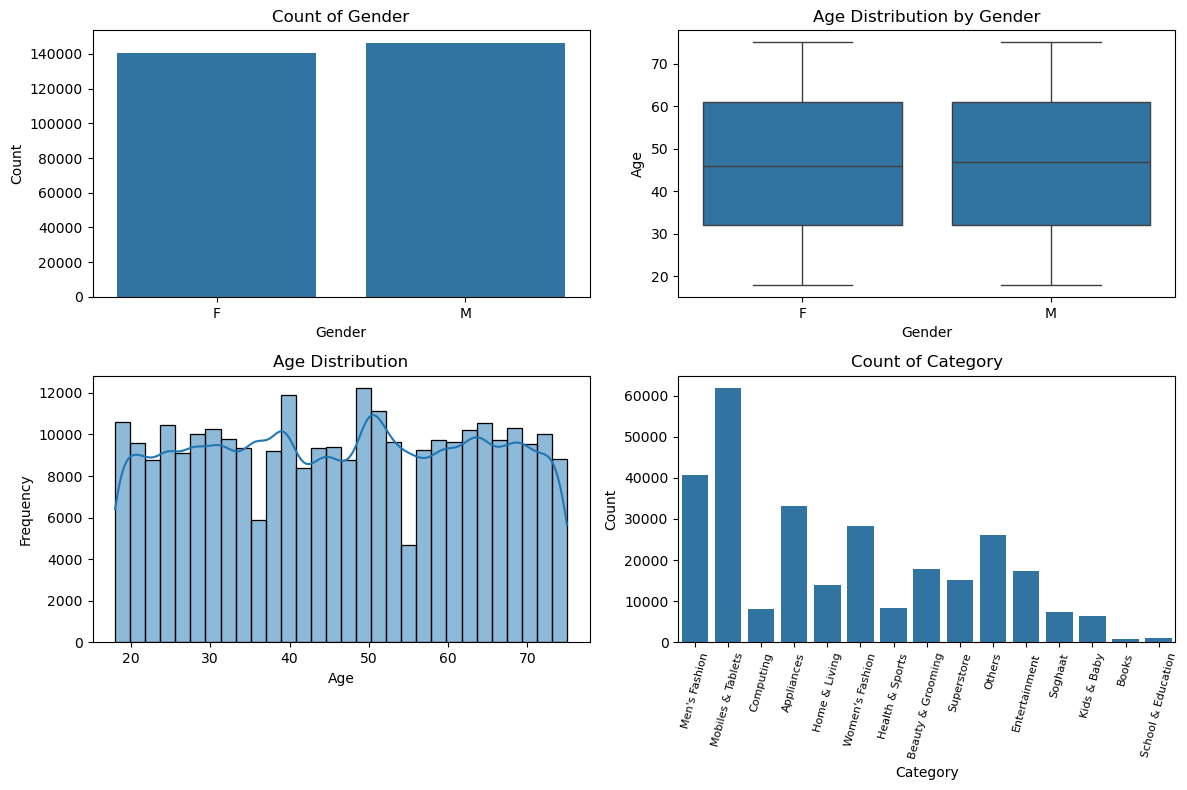

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Gender count plot
sns.countplot(x='Gender', data=df, ax=ax[0][0])
ax[0][0].set_title('Count of Gender')
ax[0][0].set_xlabel('Gender')
ax[0][0].set_ylabel('Count')

# Age distribution by gender (boxplot)
sns.boxplot(data=df, x='Gender', y='age', ax=ax[0][1])
ax[0][1].set_title('Age Distribution by Gender')
ax[0][1].set_xlabel('Gender')
ax[0][1].set_ylabel('Age')

# Age histogram with KDE
sns.histplot(df['age'], bins=30, kde=True, ax=ax[1][0])
ax[1][0].set_title('Age Distribution')
ax[1][0].set_xlabel('Age')
ax[1][0].set_ylabel('Frequency')

# Category count plot with rotated x labels
sns.countplot(x='category', data=df, ax=ax[1][1])
ax[1][1].set_title('Count of Category')
ax[1][1].set_xlabel('Category')
ax[1][1].set_ylabel('Count')
ax[1][1].tick_params(axis='x', rotation=75, labelsize=8)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Ticket promedio')

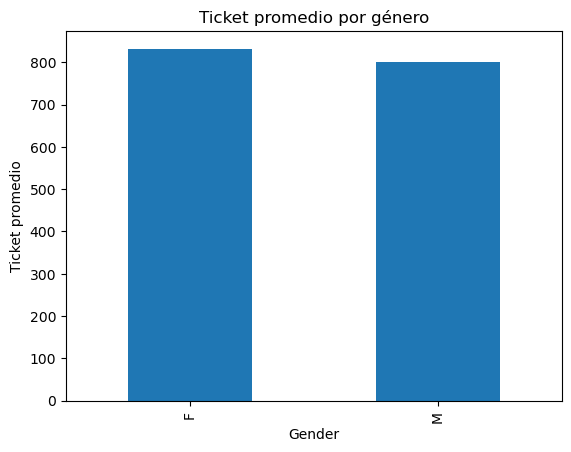

In [34]:
# Average ticket by gender
df.groupby('Gender')['total'].mean().plot(kind='bar', title='Ticket promedio por género')
plt.ylabel('Ticket promedio')

Text(0.5, 1.0, 'Ticket promedio por región')

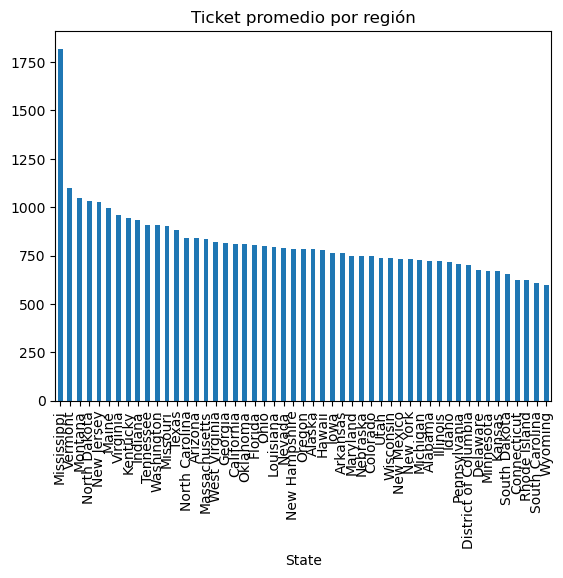

In [36]:
# Average ticket by region
df.groupby(['State'])['total'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Ticket promedio por región')

Text(0.5, 1.0, 'Ticket total por región')

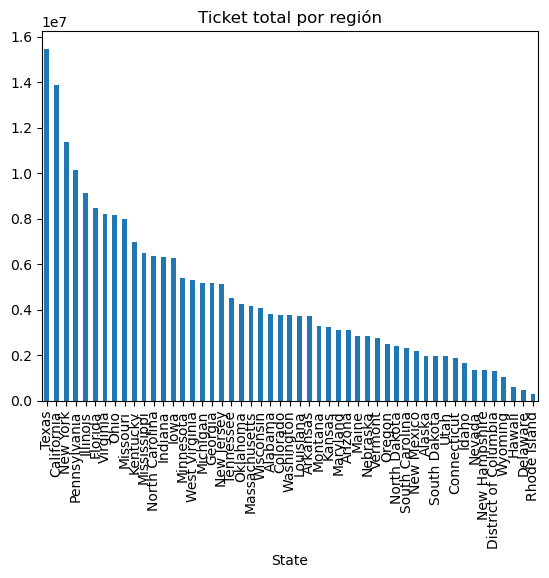

In [38]:
#  Total ticket by region
df.groupby(['State'])['total'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ticket total por región')

In [44]:
# Análisis de ventas - evolución temporal

In [40]:
# Sales by date - Temporal evolution

df['Month']=df['order_date'].dt.month
df['Year']=df['order_date'].dt.year

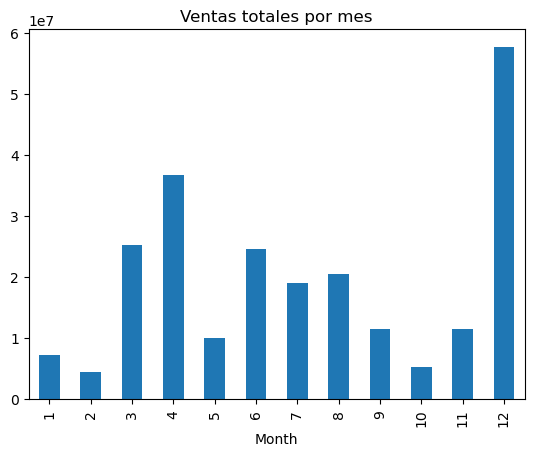

In [42]:
df.groupby('Month')['total'].sum().plot(kind='bar')
plt.title('Ventas totales por mes')
plt.show()

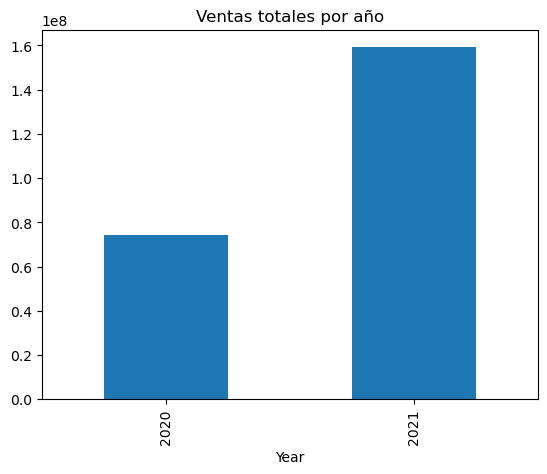

In [44]:
df.groupby('Year')['total'].sum().plot(kind='bar')
plt.title('Ventas totales por año')
plt.show()

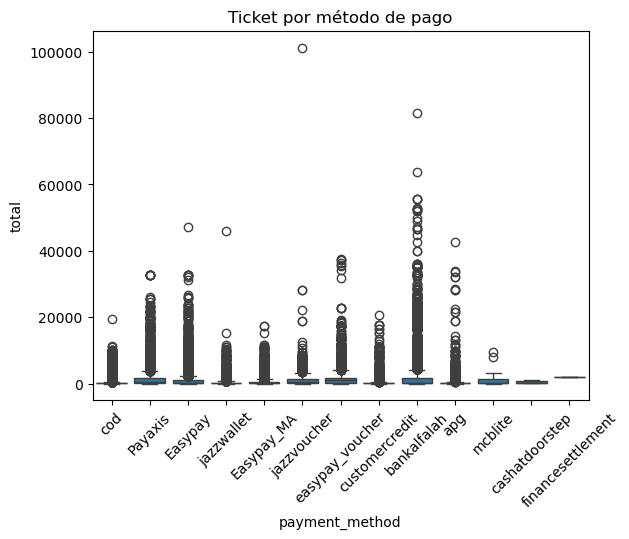

In [46]:
# Sales by payment method

sns.boxplot(x='payment_method', y='total', data=df)
plt.title('Ticket por método de pago')
plt.xticks(rotation=45)
plt.show()

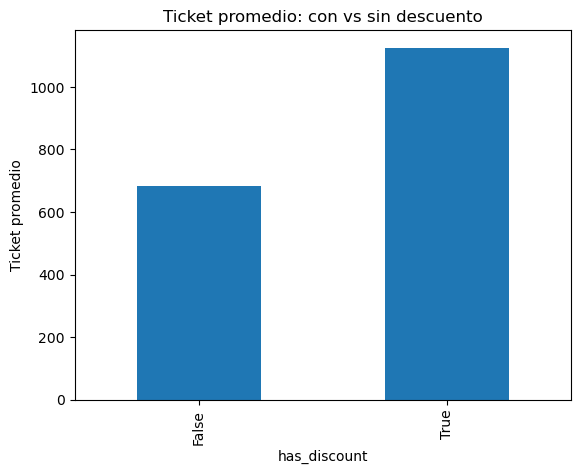

In [48]:
# Ticket by discount

df['has_discount'] = df['discount_amount'] > 0 # vemos si ha comprado con descuento o no
df.groupby('has_discount')['total'].mean().plot(kind='bar', title='Ticket promedio: con vs sin descuento')
plt.ylabel('Ticket promedio')
plt.show()

Text(0, 0.5, 'Quantity')

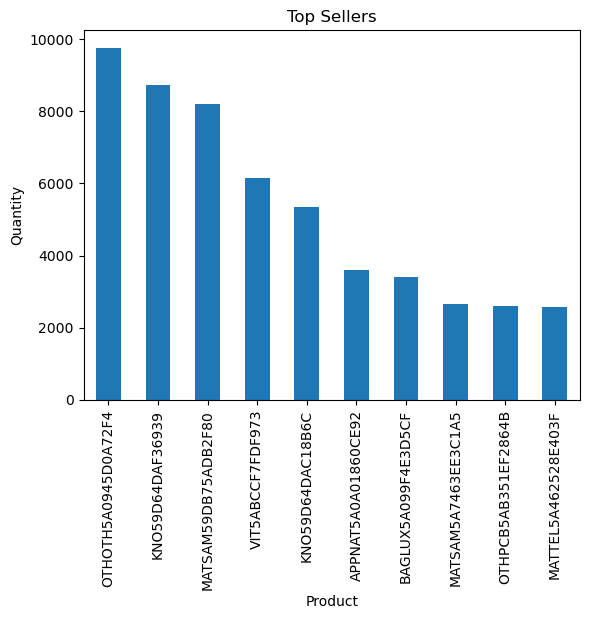

In [74]:
# top 10 productos 

top_products=df.groupby('sku')['qty_ordered'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top Sellers')
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity')

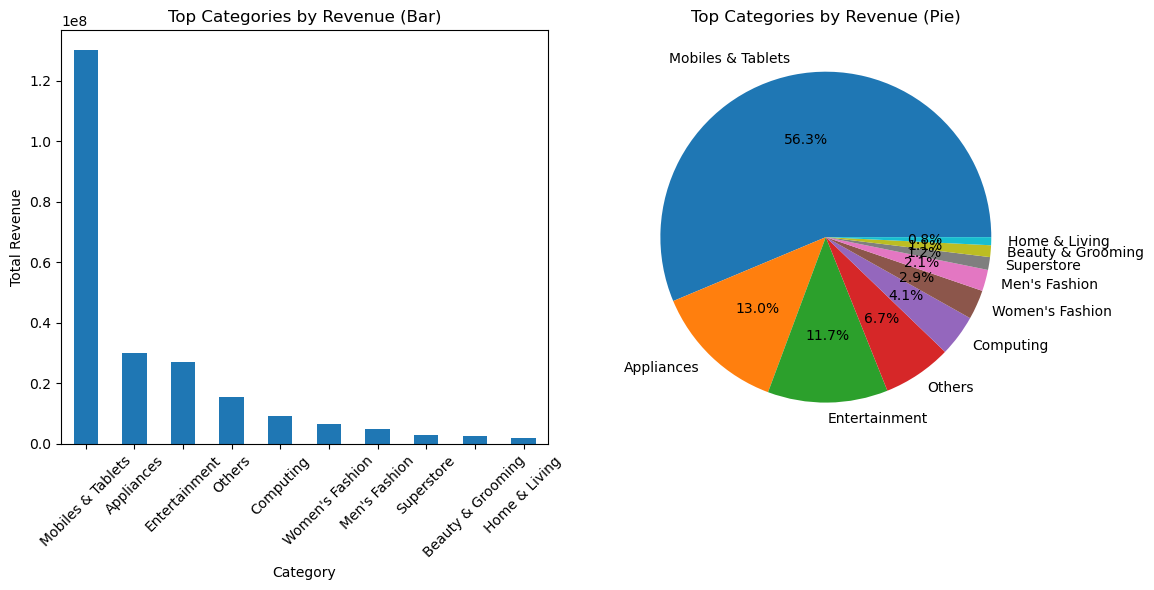

In [64]:
# Top categorias por facturación
top_categories=df.groupby(['category'])['total'].sum().sort_values(ascending=False).head(10)
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
top_categories.plot(kind='bar', ax=ax1)
top_categories.plot(kind='pie', autopct='%1.1f%%', ax=ax2)    
ax1.set_title('Top Categories by Revenue (Bar)')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Revenue')
ax1.tick_params(axis='x', rotation=45)
ax2.set_title('Top Categories by Revenue (Pie)')
ax2.set_ylabel('')
plt.tight_layout()
plt.show()

In [76]:
top_categories

category
Mobiles & Tablets    1.301120e+08
Appliances           3.006084e+07
Entertainment        2.713843e+07
Others               1.556433e+07
Computing            9.362343e+06
Women's Fashion      6.649842e+06
Men's Fashion        4.820147e+06
Superstore           2.886907e+06
Beauty & Grooming    2.644748e+06
Home & Living        1.810582e+06
Name: total, dtype: float64

Text(0, 0.5, 'Total')

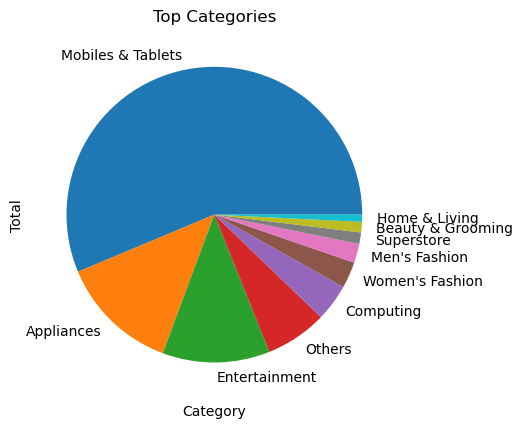

In [78]:
# Top categorias por facturación
df.groupby(['category'])['total'].sum().sort_values(ascending=False).head(10).plot(kind='pie')
plt.title('Top Categories')
plt.xlabel('Category')
plt.ylabel('Total')

In [80]:
# Customer Segmentation

customer_summary = df.groupby('cust_id').agg({
    'total': 'sum',
    'order_id': 'nunique',
    'age': 'first',
    'Gender': 'first',
    'Region': 'first'
}).reset_index()


In [118]:
customer_summ.head()

,total,total_orders,age,Gender,Region
cust_id,,,,,
4.0,27394.190,"[100367316, 100372096, 100374843, 100376930, 1...",33.0,M,Midwest
15.0,216.800,"[100356168, 100363192, 100444439]",69.0,F,Midwest
16.0,11868.899,"[100354886, 100364224, 100365561]",59.0,M,South
20.0,28719.018,"[100453069, 100453074, 100468180, 100468185, 1...",27.0,M,South
21.0,105.000,[100441734],34.0,M,South


In [84]:
# Market Basket Analysis
# Detectamos prductos que se compran juntos y oportunidades de venta cruzada - Algoritmo Apriori
!pip install mlxtend 


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.6 MB/s eta 0:00:00


In [86]:
from mlxtend.frequent_patterns import apriori, association_rules


In [88]:
# nos quedamos únicamente con las transacciones completas
df_completed=df.loc[df['status']=='complete']
df_completed=df_completed.reset_index(drop=True)

In [90]:
# creamos matriz basket
# cada fila debe de ser un pedido y cada columna debe de ser un producto, con valor 1 si fue comprado y 0 si no
# agrupamos segun order y tipo de producto, hacemos unstack
basket=df_completed.groupby(['order_id','sku'])['qty_ordered'].sum().unstack().fillna(0)

In [92]:
# convertimos los valores de qty_order a 0 y 1 segun si se han comprado
basket=basket.applymap(lambda x: 1 if x>0 else 0)

In [126]:
basket.head()

sku,APPGAB5A03123139C0F,APPNAT59F6C736DB370,APPNAT5A018FEDA562F,APPNAT5A0A01860CE92,APPTHU59F6F07255F50,APPTHU5A0AC455D60E8,APPTHU5A0B50CD45242,BAGDET59FB19B75B15A,BAGDET59FB19B7AEC6B,BAGDET5A005AB0A4032,...,ROO5AE983F1E6F05,ROO5AE983F2751EA,SOGALM5A8BD55C356EA,SOGAMB5A09BA25AF0A9,SOGAMB5A2E6713BB9AD,SOGAMB5A2E671507BC4,SOGAMB5A2E671651624,SOGREH59AC48CC0AD8E,SUN5A099F4D8C486,VIT5ABCCF7FDF973
order_id,,,,,,,,,,,,,,,,,,,,,
100356501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100356552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100356556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100356580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100356581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# aplicamos algoritmo Apriori
# min_support=0.01 significa que el producto/combinación aparece en al menos el 1% de las cestas
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

C:\Users\david\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [97]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# Ordena por lift descendente (más interesantes primero)
rules = rules.sort_values('lift', ascending=False)

In [100]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [ ]:
# no sale ningun valor. esto puede ser debido a que hay muchos productos con un único elemnto de compra

In [102]:
# Suma de productos por pedido
basket['num_products'] = basket.sum(axis=1)
print(basket['num_products'].value_counts())


num_products
1     52000
2      7057
3      2923
4      1318
5       653
6       345
7       176
8       100
9        40
10       31
11       24
13        9
12        7
14        4
16        4
27        2
15        2
17        2
29        1
19        1
25        1
Name: count, dtype: int64


In [104]:
# realizamos un mayor filtrado de los datos
product_count=df.groupby('order_id')['sku'].count()
multi_product_orders=product_count[product_count>1].index # almacenamos el order id de los pedidos que tienen más de 1 producto
df_multi=df.loc[df['order_id'].isin(multi_product_orders)]

In [106]:
# top 100 sales
top_skus=df_multi['sku'].value_counts().head(100).index
df_multi=df_multi.loc[df_multi['sku'].isin(top_skus)]

In [108]:
# basket matrix
basket = df_multi.groupby(['order_id', 'sku'])['qty_ordered'].sum().unstack().fillna(0)

In [110]:
basket=basket.applymap(lambda x: 1 if x>0 else 0)

In [112]:
# apriori --> low min_support 0.002
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

C:\Users\david\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [114]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values('lift', ascending=False)

In [128]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
214,"(LIF59D62CE49B2A2, KNO59D64DAF36939)","(KNO59D62D3528A85, RAF59D64DA5B1AE5)",0.002077,1.000000,219.760870
211,"(KNO59D62D3528A85, RAF59D64DA5B1AE5)","(LIF59D62CE49B2A2, KNO59D64DAF36939)",0.002077,0.456522,219.760870
197,"(BAGDET59FB19B75B15A, BAGDET5A005AB0A4032)","(BAGDET5A005AB125705, BAGDET59FB19B7AEC6B)",0.004353,0.830189,142.243684
200,"(BAGDET5A005AB125705, BAGDET59FB19B7AEC6B)","(BAGDET59FB19B75B15A, BAGDET5A005AB0A4032)",0.004353,0.745763,142.243684
198,"(BAGDET59FB19B75B15A, BAGDET59FB19B7AEC6B)","(BAGDET5A005AB125705, BAGDET5A005AB0A4032)",0.004353,0.800000,132.577049
199,"(BAGDET5A005AB125705, BAGDET5A005AB0A4032)","(BAGDET59FB19B75B15A, BAGDET59FB19B7AEC6B)",0.004353,0.721311,132.577049
213,"(LIF59D62CE49B2A2, RAF59D64DA5B1AE5)","(KNO59D62D3528A85, KNO59D64DAF36939)",0.002077,0.583333,131.042593
212,"(KNO59D62D3528A85, KNO59D64DAF36939)","(LIF59D62CE49B2A2, RAF59D64DA5B1AE5)",0.002077,0.466667,131.042593
215,"(RAF59D64DA5B1AE5, KNO59D64DAF36939)","(KNO59D62D3528A85, LIF59D62CE49B2A2)",0.002077,0.567568,130.398649
210,"(KNO59D62D3528A85, LIF59D62CE49B2A2)","(RAF59D64DA5B1AE5, KNO59D64DAF36939)",0.002077,0.477273,130.398649


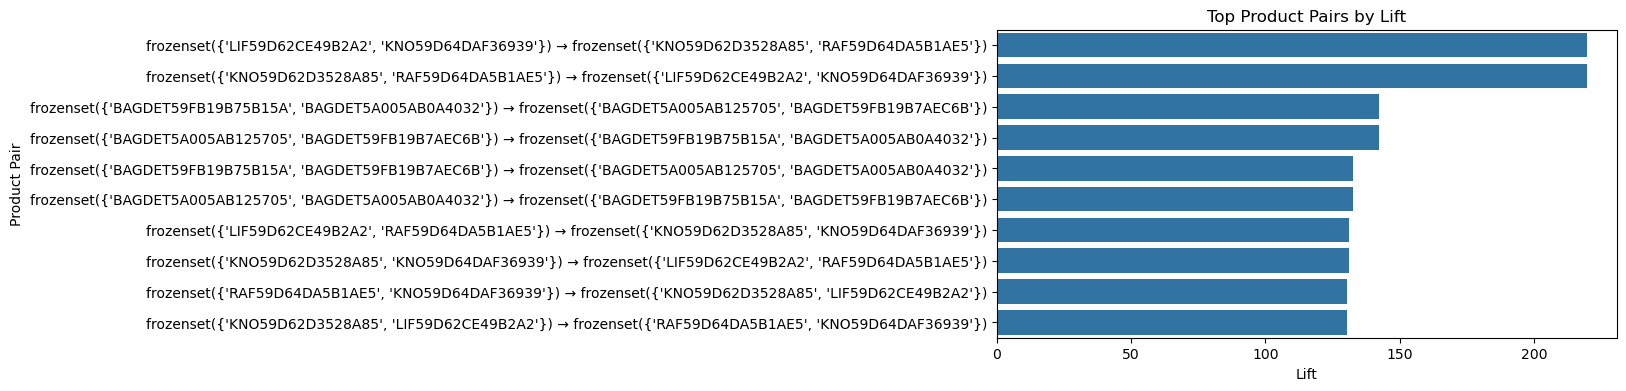

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

top_rules = rules.sort_values('lift', ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=top_rules, x='lift', y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str))
plt.xlabel('Lift')
plt.ylabel('Product Pair')
plt.title('Top Product Pairs by Lift')
plt.tight_layout()
plt.show()


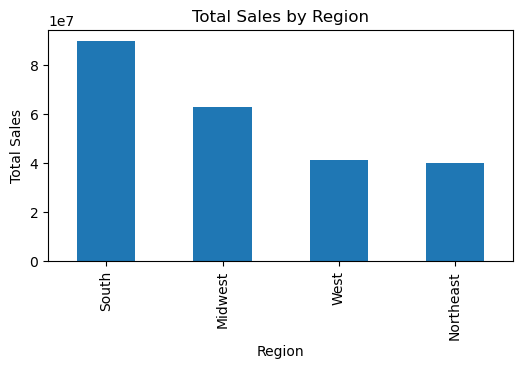

In [132]:
region_sales = df.groupby('Region')['total'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(6,3), title='Total Sales by Region')
plt.ylabel('Total Sales')
plt.show()
